In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random as rand
import os
import cv2

# curr = os.getcwd()
# curr = curr + '/bee_imgs/'
# imgs = []
# for item in os.listdir(curr):
#     if item.find(".png") != -1: 
#         pic = cv2.imread(curr + item)
#         pic = cv2.cvtColor(pic, cv2.COLOR_BGR2GRAY)
#         pic = cv2.resize(pic, (50,50))
#         data = np.asarray(pic)
#         imgs.append(data)
# print(len(imgs), "imgs")

imgs = np.load("datasets/olivetti_faces.npy")
print(imgs.shape)

(400, 64, 64)


## Visualize the data

(64, 64)
(400, 4096)


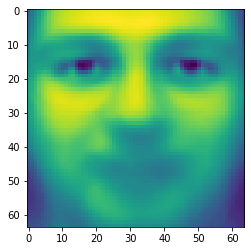

In [3]:
imgs = np.asarray(imgs)
print(imgs.mean(axis=0).shape)
mean = imgs.mean(axis=0)
imgs = imgs - mean
flatten = imgs.reshape((400,64*64))
cov = flatten.T @ flatten
print(flatten.shape)
w, v = np.linalg.eig(cov)
plt.imshow(mean)
#Get eigenfaces

### Picture Before

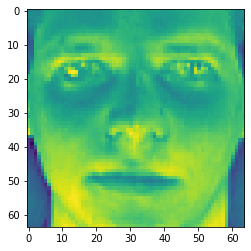

In [4]:
plt.imshow(imgs[0].reshape((64,64)))

[ 7.5172300e+03  4.4176333e+03  2.5155413e+03 ... -1.1227655e-06
  1.0194210e-06 -1.7655244e-06]
(400, 64, 64)


Text(0.5, 1.0, 'reconstructed by varying pca scores')

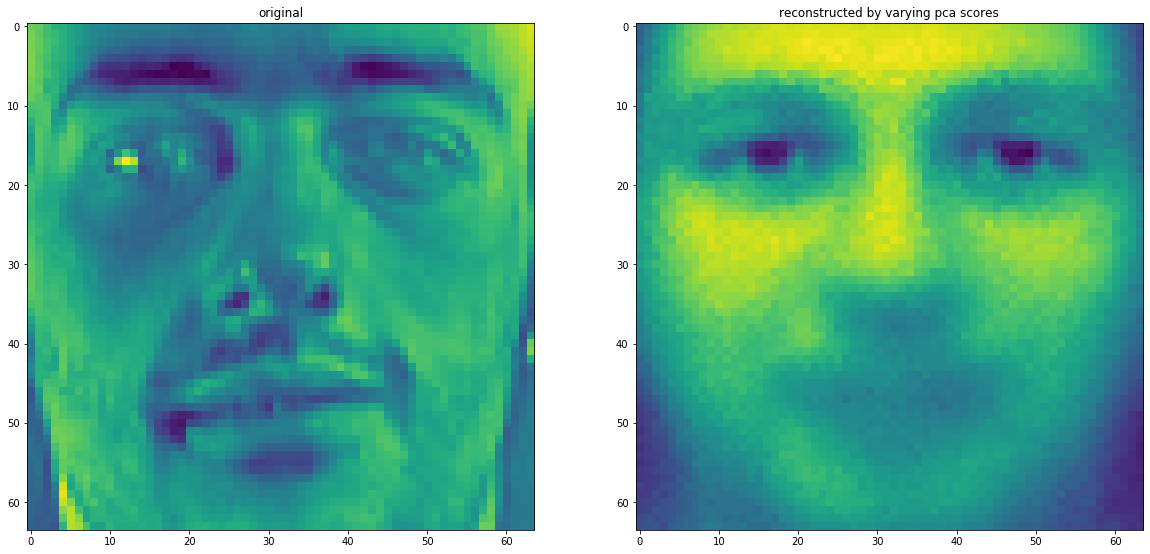

In [7]:
k = 10
firstk = v[:k]

print(w)
projected =   flatten @ firstk.T 
neweigen = w/w.max()
randvec = np.random.rand(400, k) - .5
randveck = .001 * (np.random.rand( k, 64*64) - .5)
# randvec = np.ones((400, k)) 
for row in randvec:
    row = row * neweigen[:k]
weightednoise = (.01 *  randvec)
projected = projected + weightednoise
# firstk = firstk + randveck
raw = (projected @ firstk).reshape((400, 64, 64)) + mean
print(raw.shape)
#looks like noise
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(imgs[150])
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(raw[150])
plt.title("reconstructed by varying pca scores")